In [ ]:
import geopandas as gp
import folium
import re
import matplotlib
import pandas as pd

In [ ]:
df = pd.read_excel(r'df3.xlsx')
df

,Unnamed: 0,District,Taluk,Reading_Year,Average_Reading
0,0,Bagalkot,Badami,2012,-16.318000
1,1,Bagalkot,Badami,2013,-17.640000
2,2,Bagalkot,Badami,2015,-25.995000
3,3,Bagalkot,Badami,2016,-36.104545
4,4,Bagalkot,Badami,2017,-36.277273
...,...,...,...,...,...
580,580,Bidar,Homnabad,2014,-10.176944
581,581,Bidar,Homnabad,2015,-13.882444
582,582,Bidar,Homnabad,2016,-13.648421
583,583,Bidar,Homnabad,2017,-13.165139


In [ ]:
df1 = df[["District","Reading_Year","Average_Reading"]]
df1

,District,Reading_Year,Average_Reading
0,Bagalkot,2012,-16.318000
1,Bagalkot,2013,-17.640000
2,Bagalkot,2015,-25.995000
3,Bagalkot,2016,-36.104545
4,Bagalkot,2017,-36.277273
...,...,...,...
580,Bidar,2014,-10.176944
581,Bidar,2015,-13.882444
582,Bidar,2016,-13.648421
583,Bidar,2017,-13.165139


In [ ]:
gk = df1.groupby(['District','Reading_Year'])
a = gk.groups
df4 = pd.DataFrame(columns = ['District', 'Reading_Year', 'Average_Reading'])
for i, k in a.items():
    k = gk.get_group(i)["Average_Reading"].mean()
    i = list(i)
    i.append(k)
    #print(i)
    df4.loc[len(df4.index)] = [i[0], i[1], i[2]]
#df4 = df4["Average_Reading"].mul(-1)
df4

,District,Reading_Year,Average_Reading
0,Bagalkot,2012,-16.318000
1,Bagalkot,2013,-17.640000
2,Bagalkot,2015,-25.995000
3,Bagalkot,2016,-36.104545
4,Bagalkot,2017,-23.034470
...,...,...,...
112,Bidar,2014,-11.521735
113,Bidar,2015,-11.005094
114,Bidar,2016,-11.456094
115,Bidar,2017,-11.250593


In [ ]:
gk = df1.groupby(['District','Reading_Year'])
a = gk.groups
df4 = pd.DataFrame(columns = ['District', 'Reading_Year', 'Average_Reading'])
for i, k in a.items():
    k = gk.get_group(i)["Average_Reading"].mean()
    i = list(i)
    i.append(k)
    #print(i)
    df4.loc[len(df4.index)] = [i[0], i[1], i[2]]
#df4 = df4["Average_Reading"].mul(-1)
df4

,District,Reading_Year,Average_Reading
0,Bagalkot,2012,-16.318000
1,Bagalkot,2013,-17.640000
2,Bagalkot,2015,-25.995000
3,Bagalkot,2016,-36.104545
4,Bagalkot,2017,-23.034470
...,...,...,...
112,Bidar,2014,-11.521735
113,Bidar,2015,-11.005094
114,Bidar,2016,-11.456094
115,Bidar,2017,-11.250593


In [ ]:
req = [1, 2, 4, 5, 9, 10]
df = pd.read_excel(r'sample_data.xlsx', usecols = req)
df

,WellCode,DistrictCode,Well_Lat,Well_Long,DistrictName,TalukaName
0,50111,164,16.035800,75.414000,Bagalkot,Badami
1,50103,164,15.909108,75.504936,Bagalkot,Badami
2,50104,164,16.017872,75.549453,Bagalkot,Badami
3,50107,164,15.949056,75.813439,Bagalkot,Badami
4,50109,164,15.893256,75.614853,Bagalkot,Badami
...,...,...,...,...,...,...
613,40513,169,17.380000,77.253000,Bidar,Homnabad
614,40506,169,17.510000,77.154500,Bidar,Homnabad
615,40503,169,17.510000,77.120000,Bidar,Homnabad
616,40511,169,17.400000,77.190000,Bidar,Homnabad


In [ ]:
req1 = [2, 3, 4, 5]
df1 = pd.read_excel(r'sample_data.xlsx', sheet_name ='txn_well_reading', usecols = req1 )
df1

,WellCode,Reading_Year,Reading_Month,Reading_WaterLevel
0,021006A,1997,11,0.80
1,021006A,1997,12,0.70
2,021006A,1998,1,0.75
3,021006A,1998,2,0.75
4,021006A,1998,3,0.90
...,...,...,...,...
48877,20206,2017,8,29.30
48878,20206,2017,9,29.15
48879,20206,2017,10,26.10
48880,20206,2017,11,26.05


In [ ]:
df2 = pd.merge(df, df1, on = 'WellCode')
df2

,WellCode,DistrictCode,Well_Lat,Well_Long,DistrictName,TalukaName,Reading_Year,Reading_Month,Reading_WaterLevel
0,50103,164,15.909108,75.504936,Bagalkot,Badami,2018,1,44.10
1,50103,164,15.909108,75.504936,Bagalkot,Badami,2018,2,48.50
2,50103,164,15.909108,75.504936,Bagalkot,Badami,2018,3,48.30
3,50103,164,15.909108,75.504936,Bagalkot,Badami,2018,4,48.80
4,50103,164,15.909108,75.504936,Bagalkot,Badami,2018,5,49.25
...,...,...,...,...,...,...,...,...,...
79444,40502,169,17.415000,77.124500,Bidar,Homnabad,2017,8,7.15
79445,40502,169,17.415000,77.124500,Bidar,Homnabad,2017,9,6.50
79446,40502,169,17.415000,77.124500,Bidar,Homnabad,2017,10,7.00
79447,40502,169,17.415000,77.124500,Bidar,Homnabad,2017,11,7.45


In [ ]:
df2['WellCode'].unique()

array([50103, 50104, 50107, 50110, 50112, 'Well1', 50207, 50208, 50209,
       50502, 50504, 50506, 'Well2', 13843, 50601, 50602, 50603, 50604,
       50606, 50609, 50610, 50611, 50612, 50615, 50801, 50805, 50809,
       50812, 51005, 51010, 30112, 30110, 30104, '030120HP', 30103, 30106,
       30108, 30109, 30111, 30115, 30119, 30120, 30121, 30122, '030102D',
       '030122HP', '030119D', '030106D', '030112D', '030101D', '030121HP',
       '030108D', '030501D', 30506, 30502, 30503, 30504, 30505, 30507,
       '030502D', 30203, 30204, 30207, 30210, 30211, 30406, '030410D',
       30402, 30404, 30408, 30409, 30410, 30411, 30412, '030407D',
       '030402D', '030412HP', '030409D', 30405, 30601, 30607, 30609,
       30610, 30613, 30617, 30618, 30620, 30621, '030714HP', '030703D',
       30708, '030713HP', 30703, 30705, 30707, 30709, 30710, 30712, 30713,
       30715, '030707D', '030710D', '030705D', '030715HP', 30803, 30805,
       30806, 30808, 30809, 30810, 30812, 20102, 20109, 20105, '

In [ ]:
gk = df2.groupby(['WellCode','Reading_Year'])
a = gk.groups
df3 = pd.DataFrame(columns = ['WellCode', 'DistrictName', 'TalukaName', 'Reading_Year', 'Well_Lat', 'Well_Long', 'Average_Reading'])
for i, k in a.items():
    k = gk.get_group(i)["Reading_WaterLevel"].mean()
    j = gk.get_group(i)["DistrictName"].head(1)
    l = gk.get_group(i)["Well_Lat"].unique()
    m = gk.get_group(i)["Well_Long"].unique()
    n = gk.get_group(i)["TalukaName"].head(1)
    i = list(i)
    j = list(j)
    #l = list(l)
    #m = list(m)
    n = list(n)
    i.append(j)
    i.append(l)
    i.append(m)
    i.append(k)
    i.append(n)
    #print(i)
    df3.loc[len(df3.index)] = [i[0], i[2][0], i[6][0], i[1], i[3][0], i[4][0], -(i[5])]
#df4 = df4["Average_Reading"].mul(-1)
df3

,WellCode,DistrictName,TalukaName,Reading_Year,Well_Lat,Well_Long,Average_Reading
0,10101,Bengaluru Urban,Anekal,1992,12.424000,77.421000,-16.250000
1,10101,Bengaluru Urban,Anekal,1993,12.424000,77.421000,-16.933333
2,10101,Bengaluru Urban,Anekal,1994,12.424000,77.421000,-16.533333
3,10101,Bengaluru Urban,Anekal,1995,12.424000,77.421000,-18.300000
4,10101,Bengaluru Urban,Anekal,1996,12.424000,77.421000,-18.287500
...,...,...,...,...,...,...,...
4352,20116a,Belagavi,Athni,2011,16.503500,75.002900,-38.240000
4353,20116a,Belagavi,Athni,2012,16.503500,75.002900,-46.300000
4354,20116a,Belagavi,Athni,2013,16.503500,75.002900,-43.825000
4355,Well1,Bagalkot,Badami,2018,15.915278,75.676167,-41.527000


In [ ]:
df4 = pd.DataFrame(columns = ['WellCode', 'DistrictName', 'TalukaName', 'Well_Lat', 'Well_Long', 'Slope'])
g = list(df3["WellCode"].unique())
for i in g:
    x1 = int(df3[df3["WellCode"] == i]["Reading_Year"].head(1))
    x2 = int(df3[df3["WellCode"] == i]["Reading_Year"].tail(1))
    y1 = float(df3[df3["WellCode"] == i]["Average_Reading"].head(1))
    y2 = float(df3[df3["WellCode"] == i]["Average_Reading"].tail(1))
    di = list(df3[df3["WellCode"] == i]["DistrictName"].head(1))
    ta = list(df3[df3["WellCode"] == i]["TalukaName"].head(1))
    la = list(df3[df3["WellCode"] == i]["Well_Lat"].head(1))
    lg = list(df3[df3["WellCode"] == i]["Well_Long"].head(1))
    if((x2-x1) != 0):
        slope = (y2-y1)/(x2-x1)
    df4.loc[len(df4.index)] = [i, di[0],ta[0], la[0], lg[0], slope]
df4

,WellCode,DistrictName,TalukaName,Well_Lat,Well_Long,Slope
0,10101,Bengaluru Urban,Anekal,12.424000,77.421000,-1.264231
1,10103,Bengaluru Urban,Anekal,12.775000,77.776389,0.016932
2,10104,Bengaluru Urban,Anekal,12.783333,77.633333,-0.172375
3,10105,Bengaluru Urban,Anekal,12.808333,77.583333,0.085269
4,10107,Bengaluru Urban,Anekal,12.513000,77.472200,-1.208077
...,...,...,...,...,...,...
377,10613D,Bengaluru Rural,Dod Ballapur,13.243000,77.231500,0.093250
378,11006D,Bengaluru Rural,Nelamangala,13.035700,77.191200,0.093250
379,20116a,Belagavi,Athni,16.503500,75.002900,-2.792500
380,Well1,Bagalkot,Badami,15.915278,75.676167,-2.792500


In [ ]:
qaz = df4["Slope"] >= 0
pdf1 = df4[qaz]
pdf1

,WellCode,DistrictName,TalukaName,Well_Lat,Well_Long,Slope
1,10103,Bengaluru Urban,Anekal,12.775000,77.776389,0.016932
3,10105,Bengaluru Urban,Anekal,12.808333,77.583333,0.085269
8,10203,Bengaluru Urban,Begaluru North,12.977778,77.597222,0.126961
38,13843,Bagalkot,Hungund,16.019675,76.214992,0.206667
41,20103,Belagavi,Athni,16.745581,74.901122,0.294167
...,...,...,...,...,...,...
374,040525HP,Bidar,Bhalki,17.593737,77.192919,0.093250
375,040526HP,Bidar,Bhalki,17.594965,77.185580,0.093250
376,040527HP,Bidar,Bhalki,17.567990,77.111479,0.093250
377,10613D,Bengaluru Rural,Dod Ballapur,13.243000,77.231500,0.093250


In [ ]:
wsx = df4["Slope"] <= 0
wss = df4["Slope"] >= -2
pdf2 = df4[wsx & wss]
pdf2

,WellCode,DistrictName,TalukaName,Well_Lat,Well_Long,Slope
0,10101,Bengaluru Urban,Anekal,12.424000,77.421000,-1.264231
2,10104,Bengaluru Urban,Anekal,12.783333,77.633333,-0.172375
4,10107,Bengaluru Urban,Anekal,12.513000,77.472200,-1.208077
5,10108,Bengaluru Urban,Anekal,12.480500,77.423000,-0.325586
6,10201,Bengaluru Urban,Begaluru North,12.976389,77.536111,-0.263691
...,...,...,...,...,...,...
341,030705D,Ballari,Sandur,15.155000,76.400500,-0.262083
342,030707D,Ballari,Sandur,15.013000,76.375500,-0.374667
343,030710D,Ballari,Sandur,15.075000,76.362500,-0.396667
344,030713HP,Ballari,Sandur,14.592500,76.271500,-1.595417


In [ ]:
edc = df4["Slope"] < -2
pdf3 = df4[edc]
pdf3

,WellCode,DistrictName,TalukaName,Well_Lat,Well_Long,Slope
55,20201,Belagavi,Bailhongal,15.718911,74.916131,-2.585714
58,20204,Belagavi,Bailhongal,15.430000,74.500500,-3.351290
60,20206,Belagavi,Bailhongal,15.638333,74.735856,-2.327959
65,20214,Belagavi,Bailhongal,15.772244,74.683353,-2.521633
81,20405,Belagavi,Chikodi,16.270000,74.215800,-2.671703
243,50110,Bagalkot,Badami,15.989842,75.658222,-6.001167
244,50112,Bagalkot,Badami,16.051931,75.796631,-6.001167
245,50207,Bagalkot,Bagalkot,16.168378,75.773247,-6.001167
246,50208,Bagalkot,Bagalkot,16.186967,75.694625,-6.001167
247,50209,Bagalkot,Bagalkot,16.203594,75.497797,-6.001167


In [ ]:
#GT 0 Green
latmean=pdf1['Well_Lat'].mean()
lonmean=pdf1['Well_Long'].mean()

map5 = folium.Map(location = [latmean, lonmean], zoom_start=6, tiles = 'Stamen Terrain')

def color(Slope):
    if Slope > 0:
        col = 'green'
    return col

for WellCode, DistrictName, TalukaName, Well_Lat, Well_Long, Slope in zip(pdf1['WellCode'], pdf1['DistrictName'], pdf1['TalukaName'], pdf1['Well_Lat'], pdf1['Well_Long'], pdf1['Slope']):

    name = str(WellCode) + ' | ' + DistrictName + ' | ' + TalukaName
    folium.Marker(location = [Well_Lat, Well_Long],popup = name,icon= folium.Icon(color = color(Slope),icon_color = 'yellow',icon = 'cloud')).add_to(map5)


print(map5.save('tes1.html'))

None


In [ ]:
#LT 0 & GT -2 Orange
latmean=pdf2['Well_Lat'].mean()
lonmean=pdf2['Well_Long'].mean()

map5 = folium.Map(location = [latmean, lonmean], zoom_start=7, tiles = 'Stamen Terrain')

def color(Slope):
    if Slope <= 0 and Slope >= -2:
        col = 'orange'
    return col

for WellCode, DistrictName, TalukaName, Well_Lat, Well_Long, Slope in zip(pdf2['WellCode'], pdf2['DistrictName'], pdf2['TalukaName'], pdf2['Well_Lat'], pdf2['Well_Long'], pdf2['Slope']):

    name = str(WellCode) + ' | ' + DistrictName + ' | ' + TalukaName
    folium.Marker(location = [Well_Lat, Well_Long],popup = name,icon= folium.Icon(color = color(Slope),icon_color = 'yellow',icon = 'cloud')).add_to(map5)


print(map5.save('tes1.html'))

None


In [ ]:
#LT -2 Red
latmean=pdf3['Well_Lat'].mean()
lonmean=pdf3['Well_Long'].mean()

map5 = folium.Map(location = [latmean, lonmean], zoom_start=6, tiles = 'Stamen Terrain')

def color(Slope):
    if Slope < -2 :
        col = 'red'
    return col

for WellCode, DistrictName, TalukaName, Well_Lat, Well_Long, Slope in zip(pdf3['WellCode'], pdf3['DistrictName'], pdf3['TalukaName'], pdf3['Well_Lat'], pdf3['Well_Long'], pdf3['Slope']):

    name = str(WellCode) + ' | ' + DistrictName + ' | ' + TalukaName
    folium.Marker(location = [Well_Lat, Well_Long],popup = name,icon= folium.Icon(color = color(Slope),icon_color = 'yellow',icon = 'cloud')).add_to(map5)


print(map5.save('tes1.html'))

None


In [ ]:
df3["DistrictName"].unique()

array(['Bengaluru Urban', 'Bengaluru Rural', 'Bagalkot', 'Belagavi',
       'Ballari', 'Bidar'], dtype=object)

In [ ]:
kar_geojson = gp.read_file('C:\\Users\\giris\\Downloads\\District_29.geojson')

In [ ]:
kar_geojson[["KGISDist_1", "geometry"]]

,KGISDist_1,geometry
0,Bagalkot,"MULTIPOLYGON (((541069.628 1853280.212, 541074..."
1,Ballari,"MULTIPOLYGON (((718104.006 1751075.923, 718117..."
2,Belagavi,"MULTIPOLYGON (((425996.051 1747278.565, 426030..."
3,Bengaluru (Rural),"MULTIPOLYGON (((759665.329 1492949.561, 759761..."
4,Bengaluru (Urban),"MULTIPOLYGON (((777128.955 1415825.254, 777114..."
5,Bidar,"MULTIPOLYGON (((767717.940 1968293.755, 767760..."
6,Chamrajnagar,"MULTIPOLYGON (((653621.008 1306469.379, 653697..."
7,Chik Ballapur,"MULTIPOLYGON (((821485.124 1545214.376, 821636..."
8,Chikkamagaluru,"MULTIPOLYGON (((613493.029 1536205.472, 613684..."
9,Chitradurga,"MULTIPOLYGON (((684963.112 1662826.630, 684971..."


In [ ]:
kar_geojson.head(6)

,KGISDist_1,Field1,Field2,Field3,Field4,Field5,Field6,Field7,Field8,Field9,Field10,Field11,Field12,Field13,Field14,Field15,geometry
0,Bagalkot,Bagalkot,65.79,5.84,7.78,5.84,7.26,12.14,11.26,9.73,12.55,16.70,19.22,18.61,17.48,13.84,"MULTIPOLYGON (((541069.628 1853280.212, 541074..."
1,Ballari,Ballari,10.64,9.10,9.42,6.30,7.22,10.08,11.56,10.69,10.37,11.09,12.75,12.25,14.04,11.38,"MULTIPOLYGON (((718104.006 1751075.923, 718117..."
2,Belagavi,Belagavi,6.98,6.77,6.61,5.87,6.92,11.16,13.05,11.06,10.94,13.27,13.49,12.63,11.73,10.40,"MULTIPOLYGON (((425996.051 1747278.565, 426030..."
3,Bengaluru (Rural),Bengaluru (Rural),26.93,23.57,23.87,27.56,25.62,30.43,34.63,38.48,36.59,31.87,32.95,30.95,35.54,36.42,"MULTIPOLYGON (((759665.329 1492949.561, 759761..."
4,Bengaluru (Urban),Bengaluru (Urban),18.13,16.19,16.61,18.17,21.00,25.34,30.97,32.68,30.67,25.33,26.09,23.78,28.71,26.37,"MULTIPOLYGON (((777128.955 1415825.254, 777114..."
5,Bidar,Bidar,10.33,13.96,13.02,11.00,11.10,15.58,12.77,15.56,18.79,19.06,17.38,17.69,19.32,15.92,"MULTIPOLYGON (((767717.940 1968293.755, 767760..."


<AxesSubplot:>

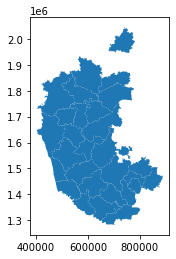

In [ ]:
kar_geojson.plot()